In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold,validation_curve,cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

C:\Users\prath\AppData\Local\Temp\ipykernel_12180\1125493021.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataset = pd.read_csv("../dataset/data.csv")
dataset

,Body Size,Body Weight,Height,Bone Structure,Com1lexion,General feel of skin,Texture of Skin,Hair Color,A11earance of Hair,Sha1e of face,...,Eyelashes,Blinking of Eyes,Cheeks,Nose,Teeth and gums,Li1s,Nails,A11etite,Liking tastes,Dosha
0,1,1,1,2,2,0,0,0,1,0,...,1,1,0,2,2,0,2,2,0,3
1,1,1,0,1,1,0,2,1,0,0,...,1,1,1,2,1,0,0,2,0,3
2,0,1,1,1,1,1,2,0,0,0,...,1,1,1,2,1,1,1,2,0,1
3,0,1,0,0,1,0,2,0,1,2,...,0,1,1,0,1,1,0,2,0,3
4,2,1,0,1,0,1,2,0,0,0,...,0,1,0,1,1,1,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,1,0,1,1,1,2,0,0,0,...,1,1,0,2,1,1,0,2,0,3
1196,1,1,2,1,1,1,2,0,0,0,...,1,1,1,0,1,1,0,1,0,3
1197,0,0,1,0,1,1,2,0,2,1,...,1,0,0,0,0,1,1,0,0,3
1198,2,2,1,2,1,1,2,0,1,2,...,1,1,2,2,1,1,0,2,0,4


In [3]:
X=dataset.iloc[:,:-1].values
X

array([[1, 1, 1, ..., 2, 2, 0],
       [1, 1, 0, ..., 0, 2, 0],
       [0, 1, 1, ..., 1, 2, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [2, 2, 1, ..., 0, 2, 0],
       [2, 1, 2, ..., 0, 0, 0]], dtype=int64)

In [4]:
Y=dataset.iloc[:,20].values
Y

array([3, 3, 1, ..., 3, 4, 3], dtype=int64)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [6]:
X_train

array([[1, 1, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 2, 0, 0],
       [2, 1, 2, ..., 1, 1, 1],
       ...,
       [1, 0, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 2, 0],
       [0, 0, 1, ..., 1, 2, 2]], dtype=int64)

In [7]:
y_train

array([3, 3, 1, 2, 3, 2, 0, 0, 0, 0, 0, 3, 3, 0, 0, 5, 3, 4, 3, 1, 3, 3,
       3, 0, 2, 3, 0, 3, 1, 0, 3, 3, 5, 3, 1, 2, 1, 3, 1, 3, 3, 1, 0, 0,
       5, 3, 3, 3, 1, 0, 1, 3, 3, 0, 3, 1, 3, 3, 3, 5, 3, 3, 0, 1, 3, 3,
       3, 3, 0, 0, 2, 3, 1, 3, 0, 0, 3, 3, 1, 3, 3, 0, 3, 3, 4, 3, 3, 0,
       3, 3, 1, 3, 3, 3, 4, 1, 3, 5, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 1, 3, 1, 1, 1, 3, 1, 3, 3, 0, 1, 1, 3, 1, 3, 0, 3, 3, 3, 2, 3,
       2, 3, 0, 0, 3, 2, 3, 0, 0, 0, 3, 3, 0, 2, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 1, 2, 0, 3, 1, 0, 3, 3,
       0, 0, 4, 3, 3, 3, 3, 5, 2, 3, 1, 3, 0, 0, 0, 0, 3, 0, 5, 3, 3, 3,
       3, 4, 3, 0, 0, 0, 0, 0, 1, 3, 0, 3, 3, 1, 0, 3, 3, 3, 3, 1, 3, 3,
       0, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 0, 2, 4, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 0, 3, 5, 3, 0, 3, 3, 3, 3, 3, 5, 3, 3, 1, 1, 3, 3, 5, 0, 3, 3,
       3, 0, 0, 3, 3, 3, 2, 0, 5, 3, 5, 0, 3, 2, 1, 1, 3, 2, 3, 3, 3, 3,
       5, 0, 3, 0, 1, 3, 3, 0, 3, 3, 3, 0, 3, 4, 3,

In [8]:
lr=LogisticRegression(max_iter=1200)

In [9]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1200)

In [10]:
print(lr.score(X_train,y_train),lr.score(X_test,y_test))

0.8976190476190476 0.8722222222222222


In [11]:
y_pred=lr.predict(X_test)
y_pred

array([1, 3, 3, 3, 5, 1, 1, 0, 2, 3, 1, 4, 1, 1, 3, 3, 1, 3, 3, 1, 3, 0,
       0, 4, 0, 3, 3, 3, 5, 4, 3, 1, 3, 4, 3, 3, 4, 3, 3, 0, 3, 3, 1, 3,
       2, 0, 3, 1, 3, 3, 3, 3, 3, 5, 0, 5, 3, 0, 3, 3, 0, 3, 3, 3, 3, 1,
       3, 3, 1, 3, 4, 3, 0, 3, 1, 3, 2, 0, 0, 2, 5, 3, 4, 3, 1, 3, 0, 0,
       3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 1, 0, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 0, 0, 3, 3, 4, 5, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 1, 3, 0, 0,
       1, 3, 0, 3, 3, 1, 3, 4, 3, 3, 1, 3, 3, 5, 2, 1, 3, 3, 1, 2, 3, 0,
       3, 3, 3, 3, 1, 1, 1, 4, 5, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 4, 3, 3,
       1, 3, 3, 3, 5, 3, 1, 3, 3, 3, 3, 3, 0, 1, 3, 1, 3, 0, 3, 4, 3, 1,
       3, 0, 1, 3, 0, 0, 3, 1, 3, 2, 3, 0, 3, 3, 0, 4, 3, 3, 3, 0, 0, 5,
       3, 3, 3, 2, 1, 0, 3, 3, 3, 1, 3, 0, 2, 4, 0, 0, 3, 0, 1, 0, 3, 0,
       0, 3, 3, 3, 0, 1, 5, 2, 1, 0, 5, 3, 2, 2, 5, 2, 1, 3, 3, 0, 3, 2,
       3, 0, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 5, 1, 3,
       3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 1, 4, 1, 2, 3,

In [12]:
target=["vata","pitta","kapha","vata+pitta","vata+kapha","pitta+kapha"]

In [13]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 55,   0,   0,  19,   0,   0],
       [  0,  40,   0,   5,   0,   0],
       [  0,   0,  20,   0,   0,   0],
       [  9,  13,   0, 161,   0,   0],
       [  0,   0,   0,   0,  22,   0],
       [  0,   0,   0,   0,   0,  16]], dtype=int64)

[]

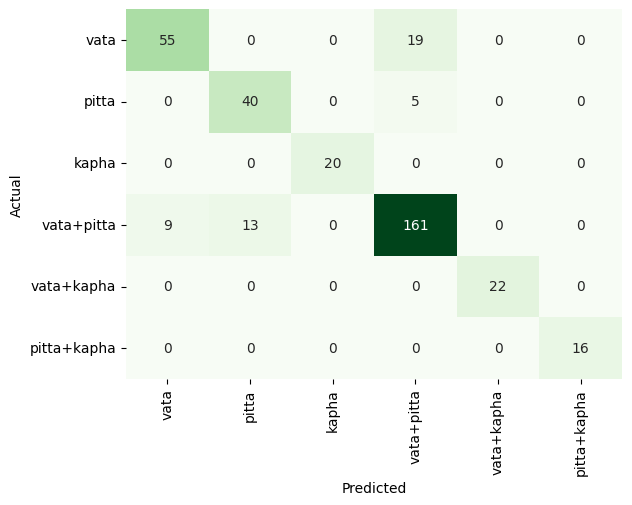

In [14]:
sns.heatmap(cm,annot=True,fmt='d',xticklabels=target,yticklabels=target,cbar=False,cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.plot()

In [15]:
print(recall_score(y_test,y_pred,average="weighted"))

0.8722222222222222


In [16]:
print(precision_score(y_test,y_pred,average="weighted"))

0.8744874266955636


In [17]:
print(f1_score(y_test,y_pred,average="weighted"))

0.8717922253442439


In [18]:
from sklearn.metrics import classification_report


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80        74
           1       0.75      0.89      0.82        45
           2       1.00      1.00      1.00        20
           3       0.87      0.88      0.88       183
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        16

    accuracy                           0.87       360
   macro avg       0.91      0.92      0.91       360
weighted avg       0.87      0.87      0.87       360



In [19]:
accuracy_score(y_test,y_pred)

0.8722222222222222